# Sékou SOUMARE

In [612]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from sklearn.model_selection import train_test_split
import math
import random
from random import uniform
from sklearn import preprocessing
from sklearn import tree
#...

# Loading the datasets

In [613]:
# Loading the main dataset and print it
dataset = pd.read_csv('./arabic_dataset.csv', delimiter=";", index_col=0)
dataset

label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
1        12       0       0       0       0       0       0       0       0   
2        22       0       0       0       0       0       0       0       0   
3        16       0       0       0       0       0       0       0       0   
4         1       0       0       0       0       0       0       0       0   
5         2       0       0       0       0       0       0       0       0   
...     ...     ...     ...     ...     ...     ...     ...     ...     ...   
1696      1       0       0       0       0       0       0       0       0   
1697     12       0       0       0       0       0       0       0       0   
1698     22       0       0       0       0       0       0       0       0   
1699     12       0       0       0       0       0       0       0       0   
1700     16       0       0       0       0       0       0       0       0   

      pixel9  ...  pixel1015  pixel1016  pixel1017  pixel1018  pixel1019  \
1          0  ...          0          0          0          0          0   
2          0  ...          0          0          0          0          0   
3          0  ...          0          0          0          0          0   
4          0  ...          0          0          0          0          0   
5          0  ...          0          0          0          0          0   
...      ...  ...        ...        ...        ...        ...        ...   
1696       0  ...          0          0          0          0          0   
1697       0  ...          0          0          0          0          0   
1698       0  ...          0          0          0          0          0   
1699       0  ...          0          0          0          0          0   
1700       0  ...          0          0          0          0          0   

      pixel1020  pixel1021  pixel1022  pixel1023  pixel1024  
1             0          0          0          0          0  
2             0          0          0          0          0  
3             0          0          0          0          0  
4             0          0          0          0          0  
5             0          0          0          0          0  
...         ...        ...        ...        ...        ...  
1696          0          0          0          0          0  
1697          0          0          0          0          0  
1698          0          0          0          0          0  
1699          0          0          0          0          0  
1700          0          0          0          0          0  

[1700 rows x 1025 columns]

In [614]:
# Loading the competition set and print it
competition = pd.read_csv('./competition.csv', delimiter=";", index_col=0)

In [615]:
competition
# You should see that there are no labels in this dataset. You'll have to predict them.
# So this dataset can not be used to fit any classifier, just to make predictions with classifiers that you designed

pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
1         0       0       0       0       0       0       0       0       0   
2         0       0       0       0       0       0       0       0       0   
3         0       0       0       0       0       0       0       0       0   
4         0       0       0       0       0       0       0       0       0   
5         0       0       0       0       0       0       0       0       0   
..      ...     ...     ...     ...     ...     ...     ...     ...     ...   
496       0       0       0       0       0       0       0       0       0   
497       0       0       0       0       0       0       0       0       0   
498       0       0       0       0       0       0       0       0       0   
499       0       0       0       0       0       0       0       0       0   
500       0       0       0       0       0       0       0       0       0   

     pixel10  ...  pixel1015  pixel1016  pixel1017  pixel1018  pixel1019  \
1          0  ...          0          0          0          0          0   
2          0  ...          0          0          0          0          0   
3          0  ...          0          0          0          0          0   
4          0  ...          0          0          0          0          0   
5          0  ...          0          0          0          0          0   
..       ...  ...        ...        ...        ...        ...        ...   
496        0  ...          0          0          0          0          0   
497        0  ...          0          0          0          0          0   
498        0  ...          0          0          0          0          0   
499        0  ...          0          0          0          0          0   
500        0  ...          0          0          0          0          0   

     pixel1020  pixel1021  pixel1022  pixel1023  pixel1024  
1            0          0          0          0          0  
2            0          0          0          0          0  
3            0          0          0          0          0  
4            0          0          0          0          0  
5            0          0          0          0          0  
..         ...        ...        ...        ...        ...  
496          0          0          0          0          0  
497          0          0          0          0          0  
498          0          0          0          0          0  
499          0          0          0          0          0  
500          0          0          0          0          0  

[500 rows x 1024 columns]

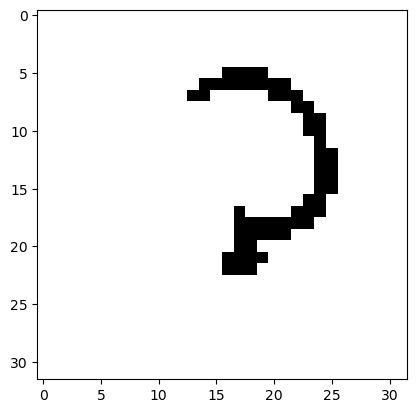

In [616]:
# Here you can see the image 0 of the dataset
idx = 0
plt.imshow(dataset.iloc[idx,1:].to_numpy().reshape(32,32),cmap = 'Greys')
# you can change the value of idx if you want to see another image

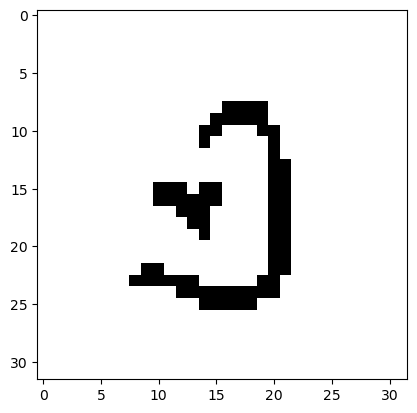

In [617]:
# Same with the image 0 of competition
idx = 0
plt.imshow(competition.iloc[idx,:].to_numpy().reshape(32,32),cmap = 'Greys')

# First guided submission to Kaggle

In [618]:
import random
pred = random.choices(np.unique(dataset.label), k=500)
# pred is a vector with 500 random values from the set of possible label values 
# we will assume that these are our 500 predictions for the competition set

In [619]:
# we put this predictions in a DataFrame with the right format expected by kaggle
df = pd.DataFrame(np.arange(1,501), columns=['Id'])
df['label'] = pred
df

Id  label
0      1     22
1      2      6
2      3      2
3      4      1
4      5     12
..   ...    ...
495  496     16
496  497     16
497  498      2
498  499     16
499  500      6

[500 rows x 2 columns]

In [1243]:
# then save it to a csv file
df.to_csv('myfirstsubmission.csv', index=False)
# You should now have a csv file on your working directory
# Go on Kaggle website, join the competition and drag this file into 'Submit predictions'. You should have a score
# This score might not be high because we have just done random predictions
# but when you'll design classifiers and make more clever predictions you will improve your score
# Later, when you'll have found an interesting classifier for each family, you have to predict the competition set
# with this classifier, put these predictions into a vector (like pred above) and apply the same procedure as
# in the previous cell

# Part 1 : preliminar analysis of the dataset

### Nombre d'individus

In [620]:
dataset.shape[0]

1700

### Nombre de descripteurs

In [621]:
dataset.shape[1]-1

1024

### La première de chose est de savoir combien valeurs differentes a la variable cible

In [622]:
# TODO
df.label.value_counts()

6     82
2     77
16    77
12    73
18    71
22    64
1     56
Name: label, dtype: int64

# Part 2 : classifiers based on raw images

### Separation des nos données apprentissage 70% | validation 15% | test 15%

In [623]:
train_data, data_test = train_test_split(dataset, test_size=0.3, random_state=4)
valid_data, test_data = train_test_split(data_test, test_size=0.5, random_state=4)

# Decision trees

### L'arbre de decision est un classifieur nous permettant de classer les individus dans un arbre de décision

### Importation du module de l'arbre

In [624]:
from sklearn import tree

### Je contruis un graphe avec les données d'apprentissage

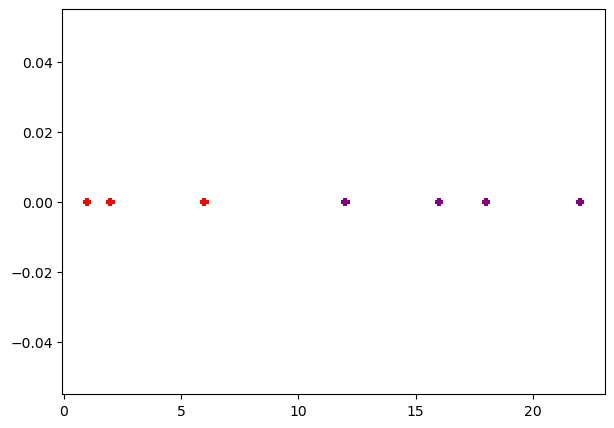

In [12]:
color_map = matplotlib.colors.ListedColormap(pd.Series(['red', 'purple']))
fig = plt.figure(figsize=  (7,5))
fig = plt.scatter(train_data.iloc[:,0], train_data.iloc[:,1], c = train_data.label, cmap = color_map, marker='+')

### Création de modèle sur données d'apprentissage

In [15]:
dt = tree.DecisionTreeClassifier().fit(train_data.iloc[:,1:], train_data.label)
dt

DecisionTreeClassifier()

### Prediction du premier individu

In [140]:
dt.predict(train_data.iloc[:1,1:])[0]

6

### Vérification de la classe du premier individu suite à la prédiction

In [65]:
train_data.iloc[:1,:]

label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
248      6       0       0       0       0       0       0       0       0   

     pixel9  ...  pixel1015  pixel1016  pixel1017  pixel1018  pixel1019  \
248       0  ...          0          0          0          0          0   

     pixel1020  pixel1021  pixel1022  pixel1023  pixel1024  
248          0          0          0          0          0  

[1 rows x 1025 columns]

### On voit bien que la prediction du premier individu est bonne

###  Calcul et Affichage des performances

In [142]:
print(dt.score(train_data.iloc[:, 1:], train_data.label)) # score de train
print(dt.score(valid_data.iloc[:, 1:], valid_data.label)) # score de valid
print(dt.score(test_data.iloc[:, 1:], test_data.label)) # scrore de test

1.0
0.5294117647058824
0.48627450980392156


### On voit ici que le score de la validaition n'est trop bon, donc je vais faire de l'elagage pour voir si sa performance va s'ameliorer et en selectionnant un alpha pour l'elagage

In [18]:
path = tree.DecisionTreeClassifier().cost_complexity_pruning_path(train_data.iloc[:,1:], train_data.label)
path

{'ccp_alphas': array([0.        , 0.00078031, 0.00078782, 0.00080032, 0.00081487,
        0.00081822, 0.00084034, 0.00084034, 0.00084034, 0.00084034,
        0.00084034, 0.00084034, 0.00084034, 0.00084034, 0.00084034,
        0.00084034, 0.00084034, 0.00084034, 0.00084034, 0.00084034,
        0.00084034, 0.00084034, 0.00084034, 0.00084034, 0.00084034,
        0.00084034, 0.00084034, 0.00084034, 0.00084034, 0.00084034,
        0.00084034, 0.00084034, 0.00084034, 0.00084034, 0.00084034,
        0.00084034, 0.00084034, 0.00112045, 0.00112045, 0.00112045,
        0.00112045, 0.00112045, 0.00112045, 0.00112045, 0.00112045,
        0.00112045, 0.00112045, 0.00112045, 0.00112045, 0.00112045,
        0.00112045, 0.00112045, 0.00112045, 0.00112045, 0.00112045,
        0.0012605 , 0.0012605 , 0.0012605 , 0.0012605 , 0.0012605 ,
        0.0012605 , 0.0012605 , 0.0012605 , 0.0012605 , 0.0012605 ,
        0.0012605 , 0.0012605 , 0.0012605 , 0.0012605 , 0.0012605 ,
        0.0012605 , 0.00130719, 0.

### Visualisation des impuretés contre  alphas sur un graphe

Text(0, 0.5, 'total impurity of leaves')

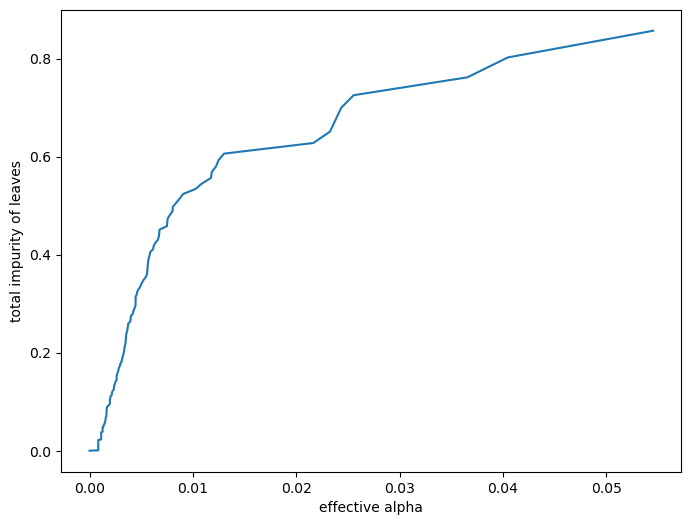

In [66]:
ccp_alphas, impurities = path.ccp_alphas, path.impurities
plt.figure(figsize=(8, 6))
plt.plot(ccp_alphas, impurities)
plt.xlabel("effective alpha")
plt.ylabel("total impurity of leaves")

### Fonction pour calculer les performances et retournant la performance d'apprentissage et validation de different alpha

In [38]:
def best_train_valid_score(train, valid):
    score_train = []
    score_valid = []
    for i in range(len(path.ccp_alphas)):
        dt_mnist_pruned = tree.DecisionTreeClassifier(ccp_alpha=path.ccp_alphas[i]).fit(train.iloc[:,1:], train.label)
        score_train.append(dt_mnist_pruned.score(train.iloc[:,1:], train.label))
        score_valid.append(dt_mnist_pruned.score(valid.iloc[:,1:], valid.label))
    return score_train, score_valid

In [21]:
t_s, v_s = best_train_valid_score(train_data, valid_data)
print(t_s, end="\n\n")
print(v_s)

[1.0, 0.9991596638655462, 0.9983193277310924, 0.9974789915966387, 0.9966386554621849, 0.9957983193277311, 0.9638655462184874, 0.9638655462184874, 0.9638655462184874, 0.9638655462184874, 0.9647058823529412, 0.9630252100840336, 0.9638655462184874, 0.9638655462184874, 0.9630252100840336, 0.9630252100840336, 0.9647058823529412, 0.9630252100840336, 0.9647058823529412, 0.9647058823529412, 0.9621848739495799, 0.9638655462184874, 0.9647058823529412, 0.9630252100840336, 0.9647058823529412, 0.9630252100840336, 0.9630252100840336, 0.9638655462184874, 0.9630252100840336, 0.9621848739495799, 0.9630252100840336, 0.9638655462184874, 0.9630252100840336, 0.9630252100840336, 0.9630252100840336, 0.9638655462184874, 0.9630252100840336, 0.9621848739495799, 0.9478991596638655, 0.946218487394958, 0.9470588235294117, 0.9512605042016806, 0.9470588235294117, 0.9487394957983193, 0.946218487394958, 0.946218487394958, 0.9512605042016806, 0.9470588235294117, 0.946218487394958, 0.9470588235294117, 0.9495798319327731

### Construction d'un graphe des performances sur données apprentissage et validation contre ccp_alphas.

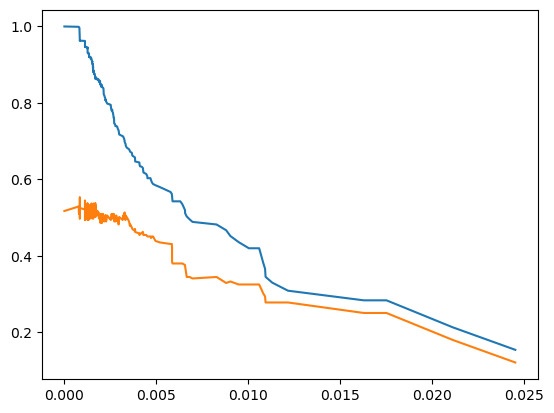

In [22]:
plt.plot(path.ccp_alphas, t_s)
plt.plot(path.ccp_alphas, v_s)

In [23]:
v_s.index(max(v_s))

25

### Calcul et Affichage des performances sur données

In [31]:
dt_pruned = tree.DecisionTreeClassifier(ccp_alpha=path.ccp_alphas[v_s.index(max(v_s))]).fit(train_data.iloc[:,1:], train_data.label)
print(dt_pruned.score(train_data.iloc[:,1:], train_data.label))
print(dt_pruned.score(valid_data.iloc[:,1:], valid_data.label))
print(dt_pruned.score(test_data.iloc[:,1:], test_data.label))

0.9621848739495799
0.5411764705882353
0.5294117647058824


### Prediction de classe sur les données de competition

In [32]:
dt = dt_pruned.predict(competition.iloc[:,:])

In [33]:
df = pd.DataFrame(np.arange(1,501), columns=['Id'])
df['label'] = dt

In [34]:
df.to_csv("decision_tree_prediction.csv", index=False)

## Conclusion

#### Faible de performance de validation

# SVM

### Étant également l'une des familles de classifieurs utilisant des noyaux permettant de convertir des problèmes non séparables en problèmes séparables en ajoutant plus de dimensions, cela rend le SVM plus puissant, précis et flexible. La variable C sert à contrôler la marge d'erreur tolérée lors de la détermination de l'hyperplan de séparation des classes.

### Importation de module SVM

In [625]:
from sklearn import svm

## Noyau Lineaire

### Creation de modèle sur données apprentissage avec le noyau lineaire

In [19]:
linear_svm = svm.SVC(C = 100, kernel = 'linear').fit(train_data.iloc[:,1:], train_data.label)
linear_svm

SVC(C=100, kernel='linear')

### Affichage des vecteurs de supports

In [139]:
linear_svm.support_vectors_

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

### Affichage des indices des vecteurs de support

In [140]:
linear_svm.support_

array([  14,   26,   38,   39,   72,   80,   88,   89,   90,   91,   93,
         95,  128,  131,  140,  152,  153,  161,  177,  218,  219,  230,
        291,  306,  307,  332,  352,  356,  358,  362,  376,  378,  390,
        400,  403,  410,  422,  424,  437,  445,  449,  478,  479,  487,
        518,  529,  546,  581,  588,  599,  629,  640,  646,  655,  710,
        720,  733,  743,  748,  762,  769,  779,  785,  804,  807,  814,
        841,  888,  897,  924,  934,  937,  952,  966,  973,  996, 1016,
       1018, 1023, 1024, 1027, 1041, 1063, 1068, 1074, 1080, 1084, 1097,
       1100, 1139, 1174,    6,   16,   83,   85,   99,  138,  148,  149,
        151,  158,  165,  189,  205,  215,  220,  223,  232,  244,  247,
        253,  263,  275,  282,  293,  308,  312,  317,  329,  330,  338,
        364,  389,  401,  406,  415,  431,  432,  434,  436,  448,  457,
        473,  484,  485,  490,  500,  516,  520,  528,  532,  533,  538,
        539,  551,  578,  579,  583,  587,  596,  6

### Visualisation des parametres des vecteurs de support

In [141]:
linear_svm.dual_coef_

array([[ 0.        ,  0.01518549,  0.        , ..., -0.        ,
        -0.        , -0.        ],
       [ 0.        ,  0.        ,  0.        , ..., -0.02864535,
        -0.03116346, -0.        ],
       [ 0.        ,  0.        ,  0.        , ..., -0.        ,
        -0.        , -0.00991012],
       [ 0.        ,  0.        ,  0.        , ..., -0.        ,
        -0.05483619, -0.        ],
       [ 0.01802863,  0.        ,  0.00529213, ..., -0.        ,
        -0.        , -0.        ],
       [ 0.        ,  0.        ,  0.00790914, ..., -0.        ,
        -0.        , -0.        ]])

### Affichage des constants du modèle

In [142]:
linear_svm.intercept_

array([ 0.69928238,  2.13629992,  1.40497539,  2.0616155 ,  2.27210321,
        1.66425134,  1.19539431,  2.23250158,  2.0937412 ,  1.12772099,
        2.27587564,  0.0643483 ,  1.11159495,  1.38820864,  0.89874889,
        1.19271782,  0.26241265,  0.87103389, -0.78665785, -1.20395302,
        0.73604374])

### Affichage des valeurs de decision des individus

In [143]:
linear_svm.decision_function(train_data.iloc[:,1:])

array([[ 0.75490644,  0.71705711,  6.2946889 , ...,  2.78532848,
         5.28601505,  4.20769533],
       [-0.28909506,  1.74725321,  0.79954479, ...,  6.29382005,
         4.18600516,  3.9578734 ],
       [ 0.69148848, -0.31880601,  2.80623368, ...,  6.31096088,
         4.3031409 ,  5.31331689],
       ...,
       [-0.29866307,  0.69280423,  5.27481803, ...,  1.84540167,
         4.26761603,  6.30308617],
       [ 0.72197441,  0.70204974,  6.30353869, ...,  5.29657967,
         1.72160225,  4.28900792],
       [-0.29691844,  1.87229619,  5.28278376, ...,  1.75052437,
         6.28728065,  4.22291757]])

### Visualisation des valeurs de decision des vecteurs support

In [144]:
linear_svm.decision_function(train_data.iloc[linear_svm.support_,1:])

array([[ 6.29479522,  0.7472348 ,  5.27716314, ...,  3.23945457,
         4.24725494,  1.7300133 ],
       [ 6.3015542 ,  1.93484033,  3.20734293, ...,  5.25023729,
         4.26729019, -0.30802489],
       [ 6.29111993,  3.20000043,  5.26604191, ..., -0.2793047 ,
         4.23949106,  1.73705143],
       ...,
       [ 0.70749993,  4.21268185,  4.21581132, ...,  2.81794892,
         2.06591322,  6.30152666],
       [-0.30588022,  3.19706937,  0.7486921 , ...,  3.87536941,
         1.81106469,  6.30578433],
       [-0.29866307,  0.69280423,  5.27481803, ...,  1.84540167,
         4.26761603,  6.30308617]])

### Calcul et Visualistaion des scores sur données

In [145]:
print(linear_svm.score(train_data.iloc[:,1:], train_data.label))
print(linear_svm.score(valid_data.iloc[:,1:], valid_data.label))
print(linear_svm.score(test_data.iloc[:,1:], test_data.label))

1.0
0.6784313725490196
0.7019607843137254


### Essai de differente valeur de c  pour savoir si le score de validation va s'améloirer

In [146]:
indice = [0.1, 0.01, 0.03, 0.05, 0.07, 0.09, 1.5, 0.3, 0.5, 0.7, 10, 20]
def selected_best_c(data_1,data_2, kernel):
    train_score=[]
    valid_score=[]
    for j in indice:
        model_svm = svm.SVC(C = j, kernel = kernel)
        model_svm.fit(data_1.iloc[:,1:], data_1.label)
        train_score.append(model_svm.score(data_1.iloc[:,1:], data_1.label))
        valid_score.append(model_svm.score(data_2.iloc[:,1:], data_2.label))
    return train_score, valid_score

### Utilisation de la fonction calculante les performances des données pour different C

In [49]:
t_s, v_s = selected_best_c(train_data, valid_data, 'linear')
print(t_s, end="\n\n")
print(v_s)

[0.9529411764705882, 0.819327731092437, 0.8957983193277311, 0.9218487394957983, 0.9411764705882353, 0.9487394957983193, 1.0, 0.9882352941176471, 0.9957983193277311, 0.9991596638655462, 1.0, 1.0]

[0.7529411764705882, 0.7372549019607844, 0.7607843137254902, 0.7411764705882353, 0.7372549019607844, 0.7490196078431373, 0.6784313725490196, 0.7019607843137254, 0.6901960784313725, 0.6862745098039216, 0.6784313725490196, 0.6784313725490196]


In [50]:
v_s.index(max(v_s))

2

### Création de modele sur données apprentissage avec la meilleure valeur de c performante le score de validation

In [20]:
linear_svm = svm.SVC(C = 0.03, kernel = 'linear').fit(train_data.iloc[:,1:], train_data.label)
linear_svm

SVC(C=0.03, kernel='linear')

### Visualisation et Calcul des performances sur données

In [21]:
print(linear_svm.score(train_data.iloc[:,1:], train_data.label))
print(linear_svm.score(valid_data.iloc[:,1:], valid_data.label))
print(linear_svm.score(test_data.iloc[:,1:], test_data.label))

0.8957983193277311
0.7607843137254902
0.7607843137254902


### On voit bien que le score a ete amelioré 0.76 contre 0.67

### Prédiction de classe sur donnnées compétition

In [53]:
linear_svm_predict = linear_svm.predict(competition.iloc[:,:])
df = pd.DataFrame(np.arange(1,501), columns=['Id'])
df['label'] = linear_svm_predict

In [54]:
df.to_csv('svm_linear_prediction.csv', index=False)

## Conclusion

### Le noyau polynomial SVM fait mieux que l'arbre de decision 0.75 contre 0.54

## Noyau Gaussien

### Création de modele sur données apprentissage avec le noyau gaussien

In [149]:
rbf_svm = svm.SVC(C = 100, gamma=10, kernel = 'rbf').fit(train_data.iloc[:,1:], train_data.label)
rbf_svm

SVC(C=100, gamma=10)

### Calcul et Visualisation des performances sur données

In [150]:
print(rbf_svm.score(train_data.iloc[:,1:], train_data.label))
print(rbf_svm.score(valid_data.iloc[:,1:], valid_data.label))
print(rbf_svm.score(test_data.iloc[:,1:], test_data.label))

1.0
0.12156862745098039
0.13725490196078433


### Essai avec differentes valeurs de c et gamma, c-à-d toutes les combinaisons (c et gamma) possibles

In [151]:
c = [0.1, 0.01, 1, 1.5, 0.05, 2, 50, 0.08]
g = [0.01, 0.05, 0.1, 0.5, 1, 3]
def best_c_and_gama(data, data_1):
    t_s = []
    v_s = []
    for k in c:
        for l in g:
            rbf_svm = svm.SVC(C = k, gamma=l, kernel = 'rbf')
            rbf_svm.fit(data.iloc[:,1:], data.label)
            t_s.append(rbf_svm.score(data.iloc[:,1:], data.label))
            v_s.append(rbf_svm.score(data_1.iloc[:,1:], data_1.label))
    return t_s, v_s

### Utilisation de la fonction calculante les scores d'apprentissage et validation pour toute combinaison de c et gamma possible et visualisation d'amélioration des scores

In [61]:
t_s, v_s = best_c_and_gama(train_data, valid_data)
print(t_s)
print(v_s)

[0.46638655462184875, 0.23277310924369748, 0.1546218487394958, 0.1546218487394958, 0.1546218487394958, 0.1546218487394958, 0.1546218487394958, 0.1546218487394958, 0.1546218487394958, 0.1546218487394958, 0.1546218487394958, 0.1546218487394958, 0.9126050420168067, 0.9991596638655462, 1.0, 1.0, 1.0, 1.0, 0.9470588235294117, 1.0, 1.0, 1.0, 1.0, 1.0, 0.1949579831932773, 0.1546218487394958, 0.1546218487394958, 0.1546218487394958, 0.1546218487394958, 0.1546218487394958, 0.9663865546218487, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.37142857142857144, 0.18571428571428572, 0.1546218487394958, 0.1546218487394958, 0.1546218487394958, 0.1546218487394958]
[0.4470588235294118, 0.19215686274509805, 0.12156862745098039, 0.12156862745098039, 0.12156862745098039, 0.12156862745098039, 0.12156862745098039, 0.12156862745098039, 0.12156862745098039, 0.12156862745098039, 0.12156862745098039, 0.12156862745098039, 0.7686274509803922, 0.7372549019607844, 0.5882352941176471, 0.12156862745098039, 0.

In [62]:
v_s.index(max(v_s))

36

### Création de modèle sur données apprentissage avec la meilleure valeur de c et gamma qui ameliore la performance de validation

In [545]:
rbf_svm = svm.SVC(C =1.5, gamma=0.02, kernel = 'rbf').fit(train_data.iloc[:,1:], train_data.label)
rbf_svm

SVC(C=1.5, gamma=0.02)

### Calcul et Affichage des performances sur données

In [546]:
print(rbf_svm.score(train_data.iloc[:,1:], train_data.label))
print(rbf_svm.score(valid_data.iloc[:,1:], valid_data.label))
print(rbf_svm.score(test_data.iloc[:,1:], test_data.label))

0.9907563025210084
0.792156862745098
0.8235294117647058


## Conclusion

### On voit que la performance de validation s'est améliorée et est meilleure que celle du noyau lineaire

In [65]:
rbf_svm_predict = rbf_svm.predict(competition.iloc[:,:])
df = pd.DataFrame(np.arange(1,501), columns=['Id'])
df['label'] = rbf_svm_predict

In [66]:
df.to_csv('svm_rbf_prediction.csv', index=False)

## Noyau Polynomial

### Création de modèle sur données apprentissage avec le noyau polynomial

In [157]:
poly_svm = svm.SVC(C = 100, degree=2, kernel = 'poly').fit(train_data.iloc[:,1:], train_data.label)
poly_svm

SVC(C=100, degree=2, kernel='poly')

### Calcul et Affichage des scores sur données

In [158]:
print(poly_svm.score(train_data.iloc[:,1:], train_data.label))
print(poly_svm.score(valid_data.iloc[:,1:], valid_data.label))
print(poly_svm.score(test_data.iloc[:,1:], test_data.label))

1.0
0.8431372549019608
0.8705882352941177


### On voit ici que le noyau polynomial a la meilleur perfermance par rapport au noyau lineaire

### Essai des valeurs possible de c et degree afin de voir si le score de validation s'est amélioré

In [69]:
c = [0.1, 0.01, 1, 1.5, 0.03, 0.5, 2, 4, 6, 8]
g = [2, 3, 4]
def best_c_and_gama(data, data_1):
    t_s = []
    v_s = []
    for k in c:
        for l in g:
            poly_svm = svm.SVC(C = k, degree=l, kernel = 'poly')
            poly_svm.fit(data.iloc[:,1:], data.label)
            t_s.append(poly_svm.score(data.iloc[:,1:], data.label))
            v_s.append(poly_svm.score(data_1.iloc[:,1:], data_1.label))
    return t_s, v_s

### Utilisation de la fonction calculantes les performances sur données d'apprentissage et validation pour toute combinaison de c et degree possible et visualisation d'amélioration des scores

In [70]:
t_s, v_s = best_c_and_gama(train_data, valid_data)
print(t_s)
print(v_s)

[0.6310924369747899, 0.45546218487394957, 0.43109243697478994, 0.1546218487394958, 0.1546218487394958, 0.1546218487394958, 0.9798319327731092, 0.9596638655462185, 0.9058823529411765, 0.9882352941176471, 0.9815126050420168, 0.9403361344537815, 0.15714285714285714, 0.16218487394957984, 0.17394957983193277, 0.9310924369747899, 0.9092436974789916, 0.8420168067226891, 0.9957983193277311, 0.9882352941176471, 0.9546218487394958, 1.0, 0.9966386554621849, 0.9857142857142858, 1.0, 0.9991596638655462, 0.9957983193277311, 1.0, 1.0, 0.9957983193277311]
[0.5647058823529412, 0.33725490196078434, 0.28627450980392155, 0.12156862745098039, 0.12156862745098039, 0.12156862745098039, 0.8156862745098039, 0.7098039215686275, 0.5490196078431373, 0.8235294117647058, 0.7372549019607844, 0.592156862745098, 0.12549019607843137, 0.12156862745098039, 0.12156862745098039, 0.7607843137254902, 0.6666666666666666, 0.5098039215686274, 0.8196078431372549, 0.7372549019607844, 0.6, 0.8313725490196079, 0.7568627450980392, 0

In [71]:
v_s.index(max(v_s))

24

### Création de modèle sur données apprentissage avec la meilleure valeur de c et dregree  améliorante le score de validation

In [159]:
poly_svm = svm.SVC(C =6, degree=2,  kernel = 'poly').fit(train_data.iloc[:,1:], train_data.label)
poly_svm

SVC(C=6, degree=2, kernel='poly')

### Calcul et Visualisation des scores sur données

In [160]:
print(poly_svm.score(train_data.iloc[:,1:], train_data.label))
print(poly_svm.score(valid_data.iloc[:,1:], valid_data.label))
print(poly_svm.score(test_data.iloc[:,1:], test_data.label))

1.0
0.8431372549019608
0.8666666666666667


### Prediction de classe sur données competition

In [74]:
poly_svm_predict = poly_svm.predict(competition.iloc[:,:])
df = pd.DataFrame(np.arange(1,501), columns=['Id'])
df['label'] = poly_svm_predict

In [75]:
df.to_csv('svm_poly_prediction.csv', index=False)

## Conclusion

### Le noyau polynomial mieux que les autres

# K-nearest-neighbour

### On regarde ceux qui se ressemblent pour les classifier

### Importation du module

In [384]:
from sklearn.neighbors import KNeighborsClassifier

### Je commence par un 1-ppv

In [385]:
knn = KNeighborsClassifier(n_neighbors=1).fit(train_data.iloc[:,1:].values, train_data.label)
knn

KNeighborsClassifier(n_neighbors=1)

### Prédiction des deux premiere features

In [386]:
knn.predict(train_data.iloc[:,1:].values)[:2]

array([ 6, 16], dtype=int64)

### Vérification de la prédiction si elle est bonne

In [79]:
train_data.iloc[:2,:]

label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
248      6       0       0       0       0       0       0       0       0   
436     16       0       0       0       0       0       0       0       0   

     pixel9  ...  pixel1015  pixel1016  pixel1017  pixel1018  pixel1019  \
248       0  ...          0          0          0          0          0   
436       0  ...          0          0          0          0          0   

     pixel1020  pixel1021  pixel1022  pixel1023  pixel1024  
248          0          0          0          0          0  
436          0          0          0          0          0  

[2 rows x 1025 columns]

### Calucl et Affichage des scores sur les données

In [80]:
print(knn.score(train_data.iloc[:,1:].values, train_data.label))
print(knn.score(valid_data.iloc[:,1:].values, valid_data.label))
print(knn.score(test_data.iloc[:,1:].values, test_data.label))

1.0
0.7490196078431373
0.7294117647058823


### Essai avec differente valeur de k

In [81]:
valid_score = []
for i in range(1, 100):
    knn = KNeighborsClassifier(n_neighbors=i).fit(train_data.iloc[:,1:].values, train_data.label)
    valid_score.append(knn.score(valid_data.iloc[:,1:].values, valid_data.label))
print(valid_score)

[0.7490196078431373, 0.6470588235294118, 0.6823529411764706, 0.6509803921568628, 0.6666666666666666, 0.6392156862745098, 0.6313725490196078, 0.6352941176470588, 0.6392156862745098, 0.6549019607843137, 0.6431372549019608, 0.6196078431372549, 0.6039215686274509, 0.592156862745098, 0.592156862745098, 0.5803921568627451, 0.5764705882352941, 0.5686274509803921, 0.5607843137254902, 0.5607843137254902, 0.5568627450980392, 0.5607843137254902, 0.5529411764705883, 0.5568627450980392, 0.5490196078431373, 0.5568627450980392, 0.5607843137254902, 0.5529411764705883, 0.5372549019607843, 0.5490196078431373, 0.5372549019607843, 0.5411764705882353, 0.5411764705882353, 0.5333333333333333, 0.5254901960784314, 0.5176470588235295, 0.5294117647058824, 0.5098039215686274, 0.5098039215686274, 0.4980392156862745, 0.5019607843137255, 0.4980392156862745, 0.49019607843137253, 0.48627450980392156, 0.4823529411764706, 0.4823529411764706, 0.4745098039215686, 0.47058823529411764, 0.47058823529411764, 0.470588235294117

In [82]:
valid_score.index(max(valid_score))

0

### Aucune amélioration de score de validation, donc on applique le 1-ppv sur données apprentissage

In [83]:
knn = KNeighborsClassifier(n_neighbors=1).fit(train_data.iloc[:,1:].values, train_data.label)
print(knn.score(train_data.iloc[:,1:].values, train_data.label))
print(knn.score(valid_data.iloc[:,1:].values, valid_data.label))
print(knn.score(test_data.iloc[:,1:].values, test_data.label))

1.0
0.7490196078431373
0.7294117647058823


### Prédiction de classe sur données competition

In [84]:
knn_predict = knn.predict(competition.iloc[:,:].values)
df = pd.DataFrame(np.arange(1,501), columns=['Id'])
df['label'] = knn_predict

In [85]:
df.to_csv('knn_prediction.csv', index=False)

## Conclusion

### Toujours le noyau polynomial reste le meilleur pour la classification sur ces données

# Random forest

### Construction de plusieurs arbre différent pour classer les individus dans un arbre 

### Importaion du module

In [587]:
from sklearn.ensemble import RandomForestClassifier

### Commence par 10 forets aleatoires, puis  calcul et affichage des scores sur les données

In [87]:
r_f = RandomForestClassifier(n_estimators=10).fit(train_data.iloc[:,1:].values, train_data.label)
print(r_f.score(train_data.iloc[:,1:].values, train_data.label))
print(r_f.score(valid_data.iloc[:,1:].values, valid_data.label))
print(r_f.score(test_data.iloc[:,1:].values, test_data.label))

0.992436974789916
0.6980392156862745
0.6784313725490196


### Essai avec different n_estimators

In [88]:
valid_score = []
for i in range(1, 100, 5):
    r_f = RandomForestClassifier(n_estimators=i).fit(train_data.iloc[:,1:].values, train_data.label)
    valid_score.append(r_f.score(valid_data.iloc[:,1:].values, valid_data.label))
valid_score.index(max(valid_score))

12

### On voit bien que la performance de validation s'est améliorée

### Application de n_estimators sur données apprentissage qui améliore la performance de validation puis calucl et visualisation des scores sur données

In [89]:
r_f = RandomForestClassifier(n_estimators=70).fit(train_data.iloc[:,1:].values, train_data.label)
print(r_f.score(train_data.iloc[:,1:].values, train_data.label))
print(r_f.score(valid_data.iloc[:,1:].values, valid_data.label))
print(r_f.score(test_data.iloc[:,1:].values, test_data.label))

1.0
0.7803921568627451
0.7725490196078432


### Prédiction de classe sur données de competition

In [90]:
rf_predict = r_f.predict(competition.iloc[:,:].values)
df = pd.DataFrame(np.arange(1,501), columns=['Id'])
df['label'] = rf_predict

In [91]:
df.to_csv('rf_prediction.csv', index=False)

## Conclusion

### Le noyau polynomial reste le plus ideal

# Logistic regression

### Généralement sur les problèmes séparables lineairement

### Importation du module

In [586]:
from sklearn.linear_model import LogisticRegression

### Création de modèle sur données apprentissage

In [93]:
lr = LogisticRegression(multi_class='multinomial', max_iter=500).fit(train_data.iloc[:,1:].values, train_data.label)
lr

LogisticRegression(max_iter=500, multi_class='multinomial')

### Calcul et Visualisation des scores sur les données

In [96]:
print(lr.score(train_data.iloc[:,1:].values, train_data.label))
print(lr.score(valid_data.iloc[:,1:].values, valid_data.label))
print(lr.score(test_data.iloc[:,1:].values, test_data.label))

0.9949579831932773
0.6901960784313725
0.7019607843137254


### Prédiction de classe sur données de competition

In [97]:
lr_predict = lr.predict(competition.iloc[:,:].values)
df = pd.DataFrame(np.arange(1,501), columns=['Id'])
df['label'] = lr_predict

In [98]:
df.to_csv('lr_prediction.csv', index=False)

## Conclusion

### Le noyau polynomial reste le plus ideal classifieur sur ces données

# Résultat sur Kaggle

### Après avoir soumis la prédiction de l'arbre de décision, j'ai obtenu un score de 0.50. Ensuite, vient celle du SVM linéaire avec 0.67, ce qui constitue une meilleure prédiction que celle de l'arbre de décision. En revanche, la prédiction du SVM RBF avec 0.14 n'est pas performante, donc le SVM linéaire reste toujours meilleur. La soumission du SVM poly a donné un score de 0.77, ce qui prédit mieux que les autres. En ce qui concerne le KNN, il a obtenu un score de 0.63, et la régression logistique a obtenu un score de 0.65. Après une nouvelle soumission pour le SVM RBF avec une petite valeur de gamma, j'ai obtenu un score de 0.73. Sur le dataset, le SVM poly prédit mieux la classe des données de la compétition, donc il est le meilleur sur ce jeu de données.

# Analyses

### Suite à une analyse approfondie des hyperparamètres du SVM, pour obtenir de meilleures performances, il serait judicieux de choisir des valeurs comprises entre 0.1 et 0.9 pour C et gamma, et entre 2 et 4 pour le degré (degree). Ainsi, la prédiction de classe sur les données de la compétition sera améliorée. En ce qui concerne le 1-ppv, il présente de meilleures performances par rapport aux différentes valeurs de K. Pour la forêt aléatoire (random forest), il faudra utiliser 70 arbres aléatoires pour obtenir une bonne performance de validation sur les données. En ce qui concerne la régression logistique, on n'observe pas une grande amélioration.

# Part 3 : using HOG representation

## Importation du module

In [626]:
from skimage.feature import hog

In [627]:
def my_hog(row, ori, cell):
    return(pd.Series(hog(row.iloc[1:].values.reshape(32,32,1), orientations=ori, pixels_per_cell=(cell, cell), cells_per_block=(6,6), channel_axis=-1)))

### Première image de dataset (1024 pixel values)

In [628]:
myimage = dataset.iloc[0,1:].to_numpy().reshape(32, 32, 1)
myimage_hog = hog(myimage, orientations=6, pixels_per_cell=(10,10), cells_per_block=(1,1), channel_axis=-1)
myimage_hog

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.31943829, 0.58901509, 0.        , 0.58901509,
       0.45175395, 0.        , 0.37371759, 0.        , 0.        ,
       0.65587162, 0.65587162, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.59829303,
       0.        , 0.        , 0.59829303, 0.53300178, 0.        ,
       0.5       , 0.5       , 0.        , 0.5       , 0.5       ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.52841346, 0.52841346, 0.        ,
       0.52841346, 0.40291148, 0.        , 0.70710678, 0.        ,
       0.        , 0.70710678, 0.        , 0.        ])

### Fonction pour séparer les données (apprentissage, validation et test) pour la représentation hog

In [629]:
def train_valid_test(train, valid, test, i, j):
    hog_train = train.apply(my_hog, axis=1, args=(i,j))
    hog_valid= valid.apply(my_hog, axis=1, args=(i,j))
    hog_test = test.apply(my_hog, axis=1, args=(i,j))
    hog_train['label'] = train.label
    hog_valid['label'] = valid.label
    hog_test['label'] =  test.label
    return hog_train, hog_valid, hog_test

### Visualisation des données apprentissage

In [630]:
hog_train,hog_valid, hog_test = train_valid_test(train_data, valid_data, test_data, 4, 4)
hog_train

0    1    2    3    4    5    6    7    8    9  ...  1287  1288  1289  \
248   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   0.0   
436   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   0.0   
1507  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   0.0   
1134  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   0.0   
1291  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   0.0   
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   ...   ...   ...   
361   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   0.0   
710   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   0.0   
440   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   0.0   
175   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   0.0   
1147  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   0.0   

      1290  1291  1292  1293  1294  1295  label  
248    0.0   0.0   0.0   0.0   0.0   0.0      6  
436    0.0   0.0   0.0   0.0   0.0   0.0     16  
1507   0.0   0.0   0.0   0.0   0.0   0.0     16  
1134   0.0   0.0   0.0   0.0   0.0   0.0      1  
1291   0.0   0.0   0.0   0.0   0.0   0.0     12  
...    ...   ...   ...   ...   ...   ...    ...  
361    0.0   0.0   0.0   0.0   0.0   0.0     22  
710    0.0   0.0   0.0   0.0   0.0   0.0     12  
440    0.0   0.0   0.0   0.0   0.0   0.0     22  
175    0.0   0.0   0.0   0.0   0.0   0.0      6  
1147   0.0   0.0   0.0   0.0   0.0   0.0     18  

[1190 rows x 1297 columns]

### Nombre d'exemples

In [631]:
hog_train.shape[0]

1190

### Nombre de descripteurs

In [632]:
hog_train.shape[1]-1

1296

### Je fais la representation de hog sur données de competition

In [633]:
def my_hog_comp(row, ori, cell):
    return(pd.Series(hog(row.iloc[0:].values.reshape(32,32,1), orientations=ori, pixels_per_cell=(cell, cell), cells_per_block=(6,6), channel_axis=-1)))

### Fonction donnante la représentation hog sur données compétition

In [634]:
def competition_hog(dataset, i, j):
    hog_competition = dataset.apply(my_hog_comp, axis=1, args=(i,j))
    return hog_competition

### Visualisation hog des données compétition

In [635]:
hog_competition = competition_hog(competition, 4, 4)
hog_competition

0     1     2     3     4     5     6     7     8     9     ...  1286  \
1     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
2     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
3     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
4     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
5     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
..    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
496   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
497   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
498   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
499   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
500   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   

     1287  1288  1289  1290  1291  1292  1293  1294  1295  
1     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
2     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
3     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
4     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
5     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
..    ...   ...   ...   ...   ...   ...   ...   ...   ...  
496   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
497   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
498   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
499   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
500   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  

[500 rows x 1296 columns]

### Changement des blocs

In [636]:
hog_train_1,hog_valid_1, hog_test_1 = train_valid_test(train_data, valid_data, test_data, 6, 4)
hog_train_1

0    1    2    3    4    5    6    7    8    9  ...  1935  1936  1937  \
248   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   0.0   
436   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   0.0   
1507  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   0.0   
1134  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   0.0   
1291  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   0.0   
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   ...   ...   ...   
361   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   0.0   
710   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   0.0   
440   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   0.0   
175   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   0.0   
1147  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   0.0   

      1938  1939  1940  1941  1942  1943  label  
248    0.0   0.0   0.0   0.0   0.0   0.0      6  
436    0.0   0.0   0.0   0.0   0.0   0.0     16  
1507   0.0   0.0   0.0   0.0   0.0   0.0     16  
1134   0.0   0.0   0.0   0.0   0.0   0.0      1  
1291   0.0   0.0   0.0   0.0   0.0   0.0     12  
...    ...   ...   ...   ...   ...   ...    ...  
361    0.0   0.0   0.0   0.0   0.0   0.0     22  
710    0.0   0.0   0.0   0.0   0.0   0.0     12  
440    0.0   0.0   0.0   0.0   0.0   0.0     22  
175    0.0   0.0   0.0   0.0   0.0   0.0      6  
1147   0.0   0.0   0.0   0.0   0.0   0.0     18  

[1190 rows x 1945 columns]

### Nombre d'exemple

In [637]:
hog_train_1.shape[0]

1190

### Nombre de descripteurs

In [638]:
hog_train_1.shape[1]-1

1944

### Représentation hog de données compétition suite au changement des blocs 

In [639]:
hog_competition_1 = competition_hog(competition, 6, 4)

# Arbre de décision

In [466]:
hog_dt = tree.DecisionTreeClassifier().fit(hog_train.iloc[:,:-1], hog_train.label)
hog_dt

DecisionTreeClassifier()

### Prédiction de l'exemple N°1 du hog train

In [467]:
hog_dt.predict(hog_train.iloc[:1,:-1])[0]

6

### Vérification de la prédiction de l'exemple N°1 

In [468]:
hog_train.iloc[:1,:]

0    1    2    3    4    5    6    7    8    9  ...  1287  1288  1289  \
248  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   0.0   

     1290  1291  1292  1293  1294  1295  label  
248   0.0   0.0   0.0   0.0   0.0   0.0      6  

[1 rows x 1297 columns]

### Calcul et Visualisation des performances sur les données

In [469]:
print(hog_dt.score(hog_train.iloc[:, :-1], hog_train.label)) 
print(hog_dt.score(hog_valid.iloc[:, :-1], hog_valid.label)) 
print(hog_dt.score(hog_test.iloc[:, :-1], hog_test.label))

1.0
0.6705882352941176
0.7137254901960784


### Elagage de l'arbre complet afin de savoir si  la performance de validation va s'ameliorer

In [470]:
path = tree.DecisionTreeClassifier().cost_complexity_pruning_path(hog_train.iloc[:,:-1], hog_train.label)
path

{'ccp_alphas': array([0.        , 0.00084034, 0.00084034, 0.00084034, 0.00084034,
        0.00084034, 0.00084034, 0.00084034, 0.00084034, 0.00084034,
        0.00084034, 0.00084034, 0.00084034, 0.00084034, 0.00084034,
        0.00084034, 0.00084034, 0.00084034, 0.00084034, 0.00084034,
        0.00112045, 0.00112045, 0.00112045, 0.00112045, 0.00112045,
        0.00112045, 0.00112045, 0.00112045, 0.00112045, 0.00112045,
        0.00112045, 0.0012605 , 0.0012605 , 0.0012605 , 0.0012605 ,
        0.0012605 , 0.0012605 , 0.0012605 , 0.0012605 , 0.0012605 ,
        0.00134454, 0.00134454, 0.00140056, 0.00140056, 0.00140056,
        0.00144058, 0.00149393, 0.00149393, 0.00151261, 0.00151261,
        0.00154062, 0.00154062, 0.00155139, 0.00155139, 0.00156062,
        0.00156062, 0.00161843, 0.00162384, 0.00163265, 0.00164835,
        0.00165011, 0.00165136, 0.00165219, 0.00166606, 0.00168067,
        0.00168067, 0.00179102, 0.00183282, 0.00183407, 0.00189076,
        0.00196078, 0.00196078, 0.

### Visualisation des impuretés sur un graphe

Text(0, 0.5, 'total impurity of leaves')

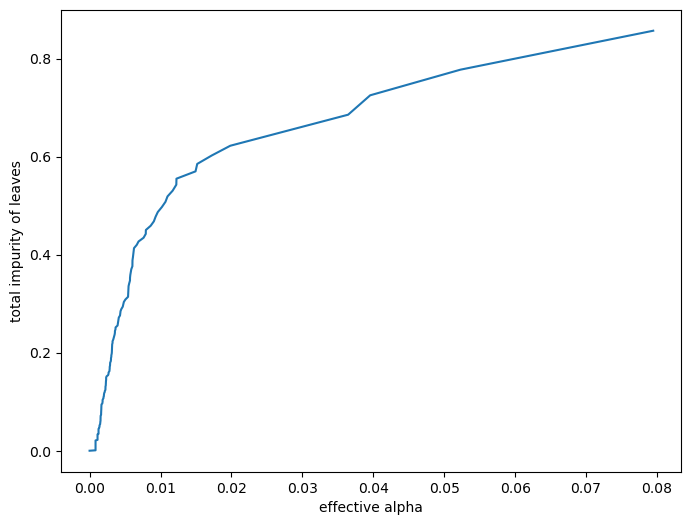

In [471]:
ccp_alphas, impurities = path.ccp_alphas, path.impurities
plt.figure(figsize=(8, 6))
plt.plot(ccp_alphas, impurities)
plt.xlabel("effective alpha")
plt.ylabel("total impurity of leaves")

### Fonction calculant les performances de validation pour different alpha 

In [472]:
def best_train_valid_score(train, valid):
    score_train = []
    score_valid = []
    for i in range(len(path.ccp_alphas)):
        hog_dt_pruned = tree.DecisionTreeClassifier(ccp_alpha=path.ccp_alphas[i]).fit(train.iloc[:,:-1], train.label)
        score_train.append(hog_dt_pruned.score(train.iloc[:,:-1], train.label))
        score_valid.append(hog_dt_pruned.score(valid.iloc[:,:-1], valid.label))
    return score_train, score_valid, score_valid.index(max(score_valid))

### Affichage des performances d'apprentissage et validation pour chaque alpha 

In [473]:
t_s, v_s, max_ind = best_train_valid_score(hog_train, hog_valid)
print(t_s, end="\n\n")
print(v_s, end="\n\n")
print(max_ind)

[1.0, 0.9798319327731092, 0.9798319327731092, 0.9747899159663865, 0.9747899159663865, 0.9747899159663865, 0.9789915966386554, 0.9747899159663865, 0.9747899159663865, 0.9789915966386554, 0.9789915966386554, 0.9747899159663865, 0.9789915966386554, 0.9789915966386554, 0.9747899159663865, 0.9747899159663865, 0.9789915966386554, 0.9789915966386554, 0.9747899159663865, 0.9747899159663865, 0.9697478991596639, 0.9663865546218487, 0.9672268907563025, 0.9689075630252101, 0.9697478991596639, 0.9697478991596639, 0.9697478991596639, 0.9689075630252101, 0.9663865546218487, 0.9689075630252101, 0.9663865546218487, 0.9647058823529412, 0.9647058823529412, 0.965546218487395, 0.9638655462184874, 0.9647058823529412, 0.9638655462184874, 0.9621848739495799, 0.9621848739495799, 0.9605042016806723, 0.9571428571428572, 0.9563025210084034, 0.9571428571428572, 0.9563025210084034, 0.957983193277311, 0.9529411764705882, 0.9554621848739496, 0.9529411764705882, 0.9521008403361344, 0.9495798319327731, 0.95042016806722

### Construction d'un graphe des performances sur données apprentissage et validation contre ccp_alphas

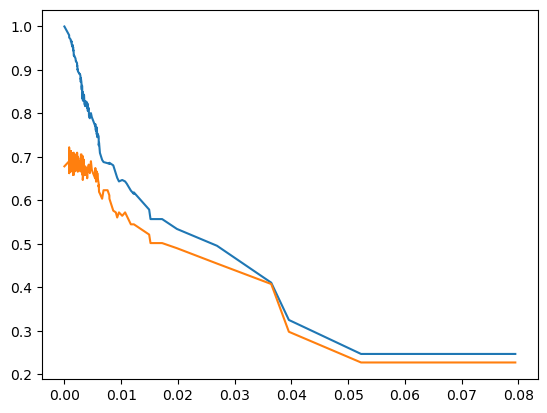

In [474]:
plt.plot(path.ccp_alphas, t_s)
plt.plot(path.ccp_alphas, v_s)

### Création de modele sur données apprentissage avec l'alpha donnant la meilleure performance de validation

In [475]:
hog_dt = tree.DecisionTreeClassifier(ccp_alpha=path.ccp_alphas[v_s.index(max(v_s))]).fit(hog_train.iloc[:,:-1], hog_train.label)

### Calcul et Affichage des performances sur données

In [476]:
print(hog_dt.score(hog_train.iloc[:, :-1], hog_train.label)) 
print(hog_dt.score(hog_valid.iloc[:, :-1], hog_valid.label)) 
print(hog_dt.score(hog_test.iloc[:, :-1], hog_test.label))

0.9798319327731092
0.7137254901960784
0.6980392156862745


### Une légère amelioration de la performance de validation suite à l'elagage

### Calcul des performances de validation pour different alpha suite au changement des blocs

In [477]:
t_s, v_s, ind_max = best_train_valid_score(hog_train_1, hog_valid_1)
print(t_s, end="\n\n")
print(v_s)

[1.0, 0.9789915966386554, 0.9789915966386554, 0.9789915966386554, 0.9789915966386554, 0.9747899159663865, 0.9789915966386554, 0.9789915966386554, 0.9747899159663865, 0.9747899159663865, 0.9747899159663865, 0.9747899159663865, 0.9747899159663865, 0.9789915966386554, 0.9789915966386554, 0.9747899159663865, 0.9798319327731092, 0.9747899159663865, 0.9789915966386554, 0.9798319327731092, 0.9680672268907563, 0.9663865546218487, 0.9689075630252101, 0.9672268907563025, 0.9672268907563025, 0.9697478991596639, 0.9672268907563025, 0.9672268907563025, 0.9689075630252101, 0.9672268907563025, 0.9697478991596639, 0.9638655462184874, 0.9647058823529412, 0.9647058823529412, 0.9638655462184874, 0.9647058823529412, 0.9647058823529412, 0.9613445378151261, 0.9613445378151261, 0.9621848739495799, 0.9571428571428572, 0.9563025210084034, 0.9571428571428572, 0.9563025210084034, 0.9554621848739496, 0.9537815126050421, 0.9554621848739496, 0.9546218487394958, 0.9537815126050421, 0.9537815126050421, 0.951260504201

### Visualisation de l'évolution des scores contre alphas sur un graphe

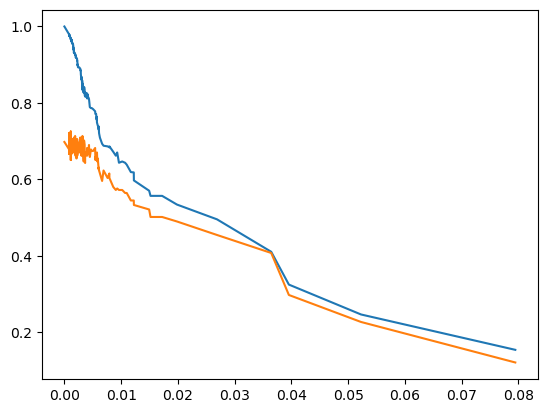

In [478]:
plt.plot(path.ccp_alphas, t_s)
plt.plot(path.ccp_alphas, v_s)

### Création de modèle avec l'alpha ameliorant le performance suite au changement des blocks

In [479]:
hog_dt_1 = tree.DecisionTreeClassifier(ccp_alpha=path.ccp_alphas[v_s.index(max(v_s))]).fit(hog_train_1.iloc[:,:-1], hog_train_1.label)

### Calcul et Affichage des score sur données

In [480]:
print(hog_dt_1.score(hog_train_1.iloc[:, :-1], hog_train_1.label)) 
print(hog_dt_1.score(hog_valid_1.iloc[:, :-1], hog_valid_1.label)) 
print(hog_dt_1.score(hog_test_1.iloc[:, :-1], hog_test_1.label))

0.9672268907563025
0.7215686274509804
0.6941176470588235


### Amélioration de la performance de validation suite au changement des blocs 0.721 contre 0.713

### Prédiction de classe des données compétition

In [318]:
hog_dt_predict = hog_dt_1.predict(hog_competition_1.iloc[:,:].values)
df = pd.DataFrame(np.arange(1,501), columns=['Id'])
df['label'] = hog_dt_predict
df.to_csv('hog_dt_prediction_01.csv', index=False)

# SVM

## Noyau Lineaire

### Création de modèle avec le noyau lineaire

In [481]:
linear_svm = svm.SVC(C = 100, kernel = 'linear').fit(hog_train.iloc[:,:-1], hog_train.label)
linear_svm

SVC(C=100, kernel='linear')

### Affichage des valeurs des vecteurs de support

In [482]:
linear_svm.support_vectors_

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

### Affichage des parametres des vecteurs de support

In [483]:
linear_svm.dual_coef_

array([[ 0.        ,  0.02050157,  0.10479572, ..., -0.        ,
        -0.        , -0.        ],
       [ 0.77454692,  0.        ,  0.        , ..., -1.61222993,
        -1.45632351, -1.36369805],
       [ 0.        ,  0.        ,  0.14557913, ..., -0.        ,
        -0.        , -0.        ],
       [ 0.        ,  0.01388762,  0.29163797, ..., -0.        ,
        -0.        , -0.33872271],
       [ 0.5723875 ,  0.        ,  0.        , ..., -0.        ,
        -0.        , -0.        ],
       [ 0.        ,  0.        ,  0.23793265, ..., -0.        ,
        -0.        , -0.61260595]])

### Affichage de constant w0 du modele

In [484]:
linear_svm.intercept_

array([ 0.47771101,  0.62188899,  1.10340913,  0.92480547,  0.55259019,
        0.98287714,  0.59476279,  2.54371233,  1.61193692,  1.00109922,
        3.67701779,  1.15254032,  0.94704898,  0.75634272,  0.94416374,
        1.31857103, -0.67687163,  0.55440918, -0.6382718 ,  2.25649817,
        0.65974976])

### Affichage des indices des vecteurs de support

In [485]:
linear_svm.support_

array([  17,   88,  113,  152,  177,  276,  295,  307,  352,  376,  378,
        400,  422,  424,  449,  478,  494,  512,  546,  599,  624,  640,
        646,  655,  720,  733,  748,  758,  814,  841,  869,  937,  952,
        966, 1024, 1027, 1041, 1063, 1139, 1174,   16,   83,  138,  148,
        149,  151,  158,  189,  205,  214,  215,  229,  232,  244,  253,
        275,  308,  338,  388,  389,  401,  432,  434,  436,  448,  456,
        457,  469,  528,  532,  539,  551,  571,  578,  579,  583,  596,
        606,  625,  628,  631,  635,  642,  662,  672,  702,  719,  725,
        735,  750,  752,  754,  756,  757,  777,  783,  787,  788,  823,
        839,  842,  847,  859,  873,  898,  901,  909,  910,  935,  953,
        955,  971, 1026, 1050, 1072, 1102, 1109, 1136, 1148, 1163, 1167,
          9,   24,   28,   32,   54,   65,  110,  115,  159,  203,  213,
        228,  236,  243,  277,  289,  290,  292,  296,  314,  322,  328,
        384,  394,  399,  419,  463,  465,  468,  4

### Affichage des valeurs de decision des vecteurs de support

In [486]:
linear_svm.decision_function(hog_train.iloc[linear_svm.support_,:-1])

array([[ 6.29513152, -0.309287  ,  3.16216344, ...,  4.2919799 ,
         5.30303314,  1.7569572 ],
       [ 6.2933128 ,  5.29887804,  0.72554711, ...,  1.74576286,
         0.72646544,  1.71217128],
       [ 6.28828323, -0.29055148,  1.71140473, ...,  5.30438253,
         4.29181243,  2.86943023],
       ...,
       [-0.30965868,  5.27497424,  1.73862721, ...,  1.86965018,
         2.20119415,  6.30212849],
       [-0.30410625,  4.30095726,  0.69128889, ...,  5.22736693,
         2.24352314,  6.30793724],
       [-0.30360065,  5.29449229,  0.69944359, ...,  4.24387523,
         3.29079968,  6.29553138]])

### Affichage des valeurs de decision de tous les individus

In [487]:
linear_svm.decision_function(hog_train.iloc[:,:-1])

array([[-0.2936325 ,  2.7915767 ,  6.31290165, ...,  1.70738382,
         5.30680931,  4.24226788],
       [-0.26399117,  1.72666122,  0.69318814, ...,  6.2896039 ,
         4.27790247,  5.2988581 ],
       [-0.25320218,  0.68833545,  2.75214025, ...,  6.30373479,
         4.21554089,  5.30286433],
       ...,
       [ 1.73800399,  4.22903641, -0.30288156, ...,  5.29177891,
         0.78893329,  6.30656674],
       [ 0.70768081,  3.17059101,  6.31231062, ...,  1.73846718,
         5.17151478, -0.30148155],
       [-0.28523848,  2.73830132,  5.13977388, ...,  0.70802494,
         6.29914155,  3.2778841 ]])

### Affichage de parametre des vecteurs de support

In [488]:
linear_svm.dual_coef_

array([[ 0.        ,  0.02050157,  0.10479572, ..., -0.        ,
        -0.        , -0.        ],
       [ 0.77454692,  0.        ,  0.        , ..., -1.61222993,
        -1.45632351, -1.36369805],
       [ 0.        ,  0.        ,  0.14557913, ..., -0.        ,
        -0.        , -0.        ],
       [ 0.        ,  0.01388762,  0.29163797, ..., -0.        ,
        -0.        , -0.33872271],
       [ 0.5723875 ,  0.        ,  0.        , ..., -0.        ,
        -0.        , -0.        ],
       [ 0.        ,  0.        ,  0.23793265, ..., -0.        ,
        -0.        , -0.61260595]])

### Visualisation des performances sur données apprentissage | validation | test (erreur de generalisation)

In [489]:
print(linear_svm.score(hog_train.iloc[:,:-1], hog_train.label))
print(linear_svm.score(hog_valid.iloc[:,:-1], hog_valid.label))
print(linear_svm.score(hog_test.iloc[:,:-1], hog_test.label))

1.0
0.8627450980392157
0.8862745098039215


### Essai de differente valeur de c pour voir si le score de validation s'ameloire

In [490]:
indice = [0.1, 0.01, 0.03, 0.07, 0.09, 1, 1.5, 0.05, 0.3, 0.7, 0.5, 0.9]
def selected_best_c(data_1,data_2, kernel):
    train_score=[]
    valid_score=[]
    for j in indice:
        model_svm = svm.SVC(C = j, kernel = kernel)
        model_svm.fit(data_1.iloc[:,:-1], data_1.label)
        train_score.append(model_svm.score(data_1.iloc[:,:-1], data_1.label))
        valid_score.append(model_svm.score(data_2.iloc[:,:-1], data_2.label))
    return train_score, valid_score

### Utilisation de la fonction calculantes les performances sur données d'apprentissage et validation pour different C et visualisation d'amélioration des scores

In [491]:
t_s, v_s = selected_best_c(hog_train, hog_valid, 'linear')
print(t_s, end="\n\n")
print(v_s)

[0.9201680672268907, 0.8016806722689076, 0.8798319327731092, 0.9117647058823529, 0.9201680672268907, 0.9756302521008403, 0.984873949579832, 0.8966386554621849, 0.9436974789915966, 0.9638655462184874, 0.9588235294117647, 0.9722689075630252]

[0.8784313725490196, 0.7607843137254902, 0.8705882352941177, 0.8941176470588236, 0.8862745098039215, 0.8627450980392157, 0.8627450980392157, 0.8901960784313725, 0.8784313725490196, 0.8588235294117647, 0.8666666666666667, 0.8588235294117647]


###  Création de modèle sur donnée apprentissage avec la valeur de c qui a amelioré la performance de validation

In [689]:
linear_svm = svm.SVC(C =0.07, kernel = 'linear').fit(hog_train.iloc[:,:-1], hog_train.label)
linear_svm

SVC(C=0.07, kernel='linear')

### Visulisation des performances sur données apprentissage | validation | test

In [690]:
print(linear_svm.score(hog_train.iloc[:,:-1], hog_train.label))
print(linear_svm.score(hog_valid.iloc[:,:-1], hog_valid.label))
print(linear_svm.score(hog_test.iloc[:,:-1], hog_test.label))

0.9117647058823529
0.8941176470588236
0.8705882352941177


### Changement des blocs pour voir si la performance de validation  s'améliore

In [691]:
linear_svm_1 = svm.SVC(C = 100, kernel = 'linear').fit(hog_train_1.iloc[:,:-1], hog_train_1.label)
linear_svm_1

SVC(C=100, kernel='linear')

### Calcul et Visualisation des scores des données

In [692]:
print(linear_svm_1.score(hog_train_1.iloc[:,:-1], hog_train_1.label))
print(linear_svm_1.score(hog_valid_1.iloc[:,:-1], hog_valid_1.label))
print(linear_svm_1.score(hog_test_1.iloc[:,:-1], hog_test_1.label))

1.0
0.8627450980392157
0.8862745098039215


### On voit aucune amélioration de la performance de validation sur hog_train_1 0.901 contre 0.917

### Utilisation de la fonction calculante les performance sur les données avec lequelles j'ai changé des blocs

In [694]:
t_s, v_s = selected_best_c(hog_train_1, hog_valid_1, 'linear')
print(t_s, end="\n\n")
print(v_s)

[0.9201680672268907, 0.8016806722689076, 0.8798319327731092, 0.9117647058823529, 0.9201680672268907, 0.9756302521008403, 0.984873949579832, 0.8966386554621849, 0.9436974789915966, 0.9638655462184874, 0.9588235294117647, 0.9722689075630252]

[0.8784313725490196, 0.7607843137254902, 0.8705882352941177, 0.8941176470588236, 0.8862745098039215, 0.8627450980392157, 0.8627450980392157, 0.8901960784313725, 0.8784313725490196, 0.8588235294117647, 0.8666666666666667, 0.8588235294117647]


In [504]:
v_s.index(max(v_s))

3

### Je vois aucune amélioration de la performance de validation, cependant, on n'observera cette amélioration que quand on a un hog avec plusieurs descripteurs entre 1000 et 1900 et un autre  plus de 1900 descripteurs. 

### Création de modèle sur données apprentissage avec la valeur c améliorante la performance de validation

In [505]:
linear_svm_1 = svm.SVC(C = indice[v_s.index(max(v_s))], kernel = 'linear').fit(hog_train_1.iloc[:,:-1], hog_train.label)
linear_svm_1

SVC(C=0.07, kernel='linear')

### Affichage des scores sur données (apprentissage | validation | test )

In [506]:
print(linear_svm_1.score(hog_train_1.iloc[:,:-1], hog_train_1.label))
print(linear_svm_1.score(hog_valid_1.iloc[:,:-1], hog_valid_1.label))
print(linear_svm_1.score(hog_test_1.iloc[:,:-1], hog_test_1.label))

0.9117647058823529
0.8941176470588236
0.8705882352941177


### Obtention d'un bon score de validation suite au changement des blocs et la valeur de c, donc prédiction de classe sur données competition

In [507]:
hog_linear_predict = linear_svm_1.predict(hog_competition_1.iloc[:,:])
df = pd.DataFrame(np.arange(1,501), columns=['Id'])
df['label'] = hog_linear_predict
df.to_csv('hog_linear_svm_prediction_05.csv', index=False)

## Noyau Gaussien

### Création de modèle sur données apprentissage avec le noyau gaussien

In [508]:
rbf_svm = svm.SVC(C = 100, gamma=10, kernel = 'rbf').fit(hog_train.iloc[:,:-1], hog_train.label)
rbf_svm

SVC(C=100, gamma=10)

### Performances sur données apprentissage | validation | test (erreur de generalisation)

In [509]:
print(rbf_svm.score(hog_train.iloc[:,:-1], hog_train.label))
print(rbf_svm.score(hog_valid.iloc[:,:-1], hog_valid.label))
print(rbf_svm.score(hog_test.iloc[:,:-1], hog_test.label))

1.0
0.12156862745098039
0.13725490196078433


### Essai des valeurs possible de c et gamma afin de voir si le score de validation s'est amélioré

In [557]:
C = [ 0.3, 0.5, 0.7, 0.9]
g = [ 0.3, 0.5, 0.7, 0.9]
def best_c_and_gama(data, data_1):
    t_s = []
    v_s = []
    for k in C:
        for l in g:
            rbf_svm = svm.SVC(C = k, gamma=l, kernel = 'rbf').fit(data.iloc[:,:-1], data.label)
            t_s.append(rbf_svm.score(data.iloc[:,:-1], data.label))
            v_s.append(rbf_svm.score(data_1.iloc[:,:-1], data_1.label))
    return t_s, v_s

### Utilisation de la fonction calculantes les performances sur données d'apprentissage et validation pour toute combinaison de c et gamma possible et visualisation d'amélioration des scores

In [558]:
t_s, v_s = best_c_and_gama(hog_train, hog_valid)
print(t_s, end="\n\n")
print(v_s)

[0.9739495798319328, 0.9436974789915966, 0.6773109243697479, 0.16554621848739495, 0.9957983193277311, 0.9983193277310924, 1.0, 0.9983193277310924, 0.9991596638655462, 1.0, 1.0, 1.0, 0.9991596638655462, 1.0, 1.0, 1.0]

[0.9058823529411765, 0.7764705882352941, 0.23137254901960785, 0.12156862745098039, 0.9490196078431372, 0.8823529411764706, 0.7215686274509804, 0.1843137254901961, 0.9450980392156862, 0.9372549019607843, 0.8431372549019608, 0.5803921568627451, 0.9568627450980393, 0.9490196078431372, 0.8823529411764706, 0.8196078431372549]


In [523]:
v_s.index(max(v_s))

9

### Création de modèle avec la valeur de c et gamma qui a amélioré la performance de validation

In [644]:
rbf_svm = svm.SVC(C =0.9, gamma=0.7, kernel = 'rbf').fit(hog_train.iloc[:,:-1], hog_train.label)
rbf_svm

SVC(C=0.9, gamma=0.7)

### Calcul et Visualisation des performances sur données

In [645]:
print(rbf_svm.score(hog_train.iloc[:,:-1], hog_train.label))
print(rbf_svm.score(hog_valid.iloc[:,:-1], hog_valid.label))
print(rbf_svm.score(hog_test.iloc[:,:-1], hog_test.label))

1.0
0.8823529411764706
0.8901960784313725


### Création de modèle à partir des données que j'ai obtenues suite au changement des blocs

In [526]:
rbf_svm_1 = svm.SVC(C =100, gamma=10, kernel = 'rbf').fit(hog_train_1.iloc[:,:-1], hog_train_1.label)
rbf_svm_1

SVC(C=100, gamma=10)

### Performances sur données apprentissage | validation | test (erreur) suite au changement des blocs

In [527]:
print(rbf_svm_1.score(hog_train_1.iloc[:,:-1], hog_train_1.label))
print(rbf_svm_1.score(hog_valid_1.iloc[:,:-1], hog_valid_1.label))
print(rbf_svm_1.score(hog_test_1.iloc[:,:-1], hog_test_1.label))

1.0
0.12156862745098039
0.13725490196078433


### Changement des blocs afin de voir quelle valeur de c et gamma améliore la performance de validation

In [528]:
t_s, v_s = best_c_and_gama(hog_train_1, hog_valid_1)
print(t_s, end="\n\n")
print(v_s)

[0.9621848739495799, 0.9789915966386554, 0.8403361344537815, 0.28319327731092436, 0.984873949579832, 0.9974789915966387, 1.0, 1.0, 0.9957983193277311, 0.9991596638655462, 1.0, 1.0, 0.9991596638655462, 1.0, 1.0, 1.0]

[0.9333333333333333, 0.8705882352941177, 0.6078431372549019, 0.13725490196078433, 0.9450980392156862, 0.9372549019607843, 0.8117647058823529, 0.3843137254901961, 0.9490196078431372, 0.9568627450980393, 0.8901960784313725, 0.7764705882352941, 0.9568627450980393, 0.9568627450980393, 0.9254901960784314, 0.8509803921568627]


In [529]:
v_s.index(max(v_s))

9

### Création de modèle avec la valeur c et gamma  améliorante le score de validation

In [647]:
rbf_svm_1 = svm.SVC(C=0.9, gamma=0.4, kernel = 'rbf').fit(hog_train_1.iloc[:,:-1], hog_train_1.label)
rbf_svm_1

SVC(C=0.9, gamma=0.4)

### Visualisation des performances sur données suite au changement des blocs

In [648]:
print(rbf_svm_1.score(hog_train_1.iloc[:,:-1], hog_train_1.label))
print(rbf_svm_1.score(hog_valid_1.iloc[:,:-1], hog_valid_1.label))
print(rbf_svm_1.score(hog_test_1.iloc[:,:-1], hog_test_1.label))

1.0
0.9568627450980393
0.9294117647058824


### On voit bien que la performance de validation s'est améliorée suite au changement des blocs. On ne  voit cette amélioration que quand on a hog avec plusieurs descripteurs entre 1000 et 1900 et un autre  avec plus de 1900 descripteurs.

### Prédiction sur données hog competition avec le modèle avec lequel j'ai eu la meilleure performance de validation

In [650]:
hog_rbf_predict = rbf_svm_1.predict(hog_competition_1.iloc[:,:])
df = pd.DataFrame(np.arange(1,501), columns=['Id'])
df['label'] = hog_rbf_predict
df.to_csv('hog_rbf_svm_prediction_002.csv', index=False)

## Conclusion

### Le noyau gaussien est meilleur que le noyau lineaire  0.956 contre 0.894

## Noyau Polynomial

### Création de modèle sur données apprentissage avec le noyau polynomial

In [537]:
poly_svm = svm.SVC(C = 100, degree=2, kernel = 'poly').fit(hog_train.iloc[:,:-1], hog_train.label)
poly_svm

SVC(C=100, degree=2, kernel='poly')

### Performances sur données apprentissage | validation | test (erreur de generalisation)

In [538]:
print(poly_svm.score(hog_train.iloc[:,:-1], hog_train.label))
print(poly_svm.score(hog_valid.iloc[:,:-1], hog_valid.label))
print(poly_svm.score(hog_test.iloc[:,:-1], hog_test.label))

1.0
0.9411764705882353
0.9529411764705882


### Recherche de c et dregree qui peuvent eventuellement améliorer la performance de validation

In [539]:
C = [0.2, 0.4, 0.6, 0.8, 0.9]
degree = [2, 3, 4]
def best_c_and_degree(data, data_1, kernel):
    t_s = []
    v_s = []
    for k in C:
        for d in degree:
            poly_svm = svm.SVC(C = k, degree=d, kernel = kernel).fit(data.iloc[:,:-1], data.label)
            t_s.append(poly_svm.score(data.iloc[:,:-1], data.label))
            v_s.append(poly_svm.score(data_1.iloc[:,:-1], data_1.label))
    return t_s, v_s

### Utilisation de la fonction calculantes les performances sur données d'apprentissage et validation pour toute combinaison de c et degree possible et visualisation d'amélioration des scores

In [540]:
t_s, v_s = best_c_and_degree(hog_train, hog_valid, 'poly')
print(t_s, end="\n\n")
print(v_s)

[0.9411764705882353, 0.9739495798319328, 0.992436974789916, 0.973109243697479, 0.9949579831932773, 0.9991596638655462, 0.9831932773109243, 0.9991596638655462, 1.0, 0.9941176470588236, 0.9991596638655462, 1.0, 0.9949579831932773, 0.9991596638655462, 1.0]

[0.9254901960784314, 0.9450980392156862, 0.9568627450980393, 0.9450980392156862, 0.9568627450980393, 0.9686274509803922, 0.9529411764705882, 0.9568627450980393, 0.9607843137254902, 0.9450980392156862, 0.9568627450980393, 0.9647058823529412, 0.9490196078431372, 0.9607843137254902, 0.9647058823529412]


In [542]:
v_s.index(max(v_s))

5

### Céation de modèle avec la valeur de c et degree améliorante la performance de validation

In [653]:
poly_svm = svm.SVC(C=0.7, degree=5, kernel = 'poly').fit(hog_train.iloc[:,:-1], hog_train.label)
poly_svm

SVC(C=0.7, degree=5, kernel='poly')

### Calcul et Affichage des performances sur données

In [654]:
print(poly_svm.score(hog_train.iloc[:,:-1], hog_train.label))
print(poly_svm.score(hog_valid.iloc[:,:-1], hog_valid.label))
print(poly_svm.score(hog_test.iloc[:,:-1], hog_test.label))

1.0
0.9568627450980393
0.9607843137254902


### Calcul des performances sur les données que j'ai obtenues suite au changement des blocs

In [549]:
t_s, v_s = best_c_and_degree(hog_train_1, hog_valid_1, 'poly')
print(t_s, end="\n\n")
print(v_s)

[0.9369747899159664, 0.9689075630252101, 0.984873949579832, 0.9663865546218487, 0.9899159663865547, 0.9983193277310924, 0.9815126050420168, 0.9991596638655462, 0.9991596638655462, 0.9907563025210084, 0.9991596638655462, 1.0, 0.9932773109243698, 0.9991596638655462, 1.0]

[0.9176470588235294, 0.9450980392156862, 0.9450980392156862, 0.9372549019607843, 0.9450980392156862, 0.9607843137254902, 0.9490196078431372, 0.9529411764705882, 0.9647058823529412, 0.9411764705882353, 0.9568627450980393, 0.9607843137254902, 0.9450980392156862, 0.9568627450980393, 0.9607843137254902]


In [550]:
v_s.index(max(v_s))

8

### On voit que la performance de validation s'est améliorée.  On ne  voit cette amélioration que quand on a hog avec plusieurs descripteurs entre 1000 et 1900 et un autre avec plus de 1900 descripteurs.

### Création avec la valeur c et degree qui améliore la performance de validation

In [684]:
poly_svm_1 = svm.SVC(C=0.2, degree=2, kernel = 'poly').fit(hog_train_1.iloc[:,:-1], hog_train_1.label)
poly_svm_1

SVC(C=0.2, degree=2, kernel='poly')

### Calcul et Visualisation des performances sur données

In [685]:
print(poly_svm_1.score(hog_train_1.iloc[:,:-1], hog_train_1.label))
print(poly_svm_1.score(hog_valid_1.iloc[:,:-1], hog_valid_1.label))
print(poly_svm_1.score(hog_test_1.iloc[:,:-1], hog_test_1.label))

0.9369747899159664
0.9176470588235294
0.9019607843137255


### Prédiction sur les données hog competition avec le modèle avec lequel j'ai obtenu la meilleure performance de validation

In [686]:
hog_poly_predict = poly_svm_1.predict(hog_competition_1.iloc[:,:])
df = pd.DataFrame(np.arange(1,501), columns=['Id'])
df['label'] = hog_poly_predict
df.to_csv('hog_poly_svm_prediction_007.csv', index=False)

## Conclusion

### La performance de noyau polynomial est meilleure que celle-ci du noyau gaussien 0.96 contre 0.956, les deux noyaux ont de meilleur score de validation suite au changement des blocs.

# K-nearest-neighbour

### Application de 1-ppv sur données apprentissage

In [567]:
knn = KNeighborsClassifier(n_neighbors=1).fit(hog_train.iloc[:,:-1], hog_train.label)
knn

KNeighborsClassifier(n_neighbors=1)

### Scores sur données apprentissage | validation | test (erreur de generalisation) avec 1-ppv

In [568]:
print(knn.score(hog_train.iloc[:,:-1].values, hog_train.label))
print(knn.score(hog_valid.iloc[:,:-1].values, hog_valid.label))
print(knn.score(hog_test.iloc[:,:-1].values, hog_test.label))

1.0
0.9450980392156862
0.9176470588235294


### Fonction permettant de calculer les performances d'apprentissage et validation de different k

In [569]:
def knn_perf(data1, data2):
    train_perf = []
    val_perf = []
    for i in range(5, 100, 5):
        knn = KNeighborsClassifier(n_neighbors=i).fit(data1.iloc[:,:-1], data1.label)
        train_perf.append(knn.score(data1.iloc[:,:-1].values, data1.label))
        val_perf.append(knn.score(data2.iloc[:,:-1].values, data2.label))
    return train_perf, val_perf

### Utilisation de la fonction calculant les performances pour obtenir la valeur de le score max de validation

In [570]:
train_perf, val_perf = knn_perf(hog_train, hog_valid)
print(train_perf, end="\n")
print(val_perf)

[0.9571428571428572, 0.9378151260504202, 0.9184873949579831, 0.9033613445378151, 0.8966386554621849, 0.8840336134453781, 0.8773109243697479, 0.8697478991596639, 0.8588235294117647, 0.8613445378151261, 0.8579831932773109, 0.8487394957983193, 0.8378151260504202, 0.8327731092436975, 0.826890756302521, 0.8218487394957983, 0.8134453781512605, 0.8142857142857143, 0.8126050420168067]
[0.9372549019607843, 0.9176470588235294, 0.9137254901960784, 0.8823529411764706, 0.8901960784313725, 0.9058823529411765, 0.8901960784313725, 0.8901960784313725, 0.9019607843137255, 0.8901960784313725, 0.8862745098039215, 0.8784313725490196, 0.8823529411764706, 0.8666666666666667, 0.8745098039215686, 0.8588235294117647, 0.8431372549019608, 0.8470588235294118, 0.8509803921568627]


In [571]:
val_perf.index(max(val_perf))

0

### Aucune amélioration de la performance de validation sur données avant changement des blocs

### Essai sur les données otenues suite au changement des blocs si le score de validation va s'améliorer

In [572]:
train_perf_1, val_perf_1 = knn_perf(hog_train_1, hog_valid_1)
print(train_perf_1, end="\n\n")
print(val_perf_1)

[0.9571428571428572, 0.9378151260504202, 0.9184873949579831, 0.9033613445378151, 0.8966386554621849, 0.8840336134453781, 0.8773109243697479, 0.8697478991596639, 0.8588235294117647, 0.8613445378151261, 0.8579831932773109, 0.8487394957983193, 0.8378151260504202, 0.8327731092436975, 0.826890756302521, 0.8218487394957983, 0.8134453781512605, 0.8142857142857143, 0.8126050420168067]

[0.9372549019607843, 0.9176470588235294, 0.9137254901960784, 0.8823529411764706, 0.8901960784313725, 0.9058823529411765, 0.8901960784313725, 0.8901960784313725, 0.9019607843137255, 0.8901960784313725, 0.8862745098039215, 0.8784313725490196, 0.8823529411764706, 0.8666666666666667, 0.8745098039215686, 0.8588235294117647, 0.8431372549019608, 0.8470588235294118, 0.8509803921568627]


In [573]:
val_perf_1.index(max(val_perf_1))

0

### On voit une amélioration de la performance de validation suite aux changements des blocs

### Application de k-ppv sur données apprentissage améliorant la performance de validation. On ne voit cette amélioration que quand on a hog avec plusieurs descripteurs entre 1000 et 1900 et un autre avec plus de 1900 descripteurs. 

In [580]:
knn_1 = KNeighborsClassifier(n_neighbors=4).fit(hog_train_1.iloc[:,:-1], hog_train_1.label)

### Visualisation à nouveau les performances sur données

In [581]:
print(knn_1.score(hog_train_1.iloc[:,:-1].values, hog_train_1.label))
print(knn_1.score(hog_valid_1.iloc[:,:-1].values, hog_valid.label))
print(knn_1.score(hog_test_1.iloc[:,:-1].values, hog_test_1.label))

0.9487394957983193
0.9098039215686274
0.9058823529411765


### Prédiction sur les données hog competition avec le k-ppv avec lequel j'ai obtenu la meilleure performance en validation

In [584]:
hog_knn_predict = knn_1.predict(hog_competition_1.iloc[:,:].values)
df = pd.DataFrame(np.arange(1,501), columns=['Id'])
df['label'] = hog_knn_predict
df.to_csv('hog_knn_prediction_01.csv', index=False)

## Conclusion

### Le noyau polynomial meilleur que K-nearst-neighbors 0.96 contre 0.909

# Random forest

### Création des 10 forets aléatoires

In [588]:
r_f = RandomForestClassifier(n_estimators=10).fit(hog_train.iloc[:,:-1], hog_train.label)
r_f

RandomForestClassifier(n_estimators=10)

### Performances sur données avec n_estimators = 10

In [589]:
print(r_f.score(hog_train.iloc[:,:-1].values, hog_train.label))
print(r_f.score(hog_valid.iloc[:,:-1].values, hog_valid.label))
print(r_f.score(hog_test.iloc[:,:-1].values, hog_test.label))

0.9974789915966387
0.803921568627451
0.8352941176470589


### Variation de n_estimators afin de voir lequel permettant d'améliorer la perforrmance de validation

In [590]:
def best_n_estimators(data1, data2):
    valid_score = []
    train_score = []
    for i in range(5, 100, 5):
        r_f = RandomForestClassifier(n_estimators=i).fit(data1.iloc[:,:-1], data1.label)
        train_score.append(r_f.score(data1.iloc[:,:-1], data1.label))
        valid_score.append(r_f.score(data2.iloc[:,:-1], data2.label))
    return train_score, valid_score

### Utilisation de la fonction pour calculer les performances des données

In [591]:
t_s, v_s = best_n_estimators(hog_train, hog_valid)
print(t_s, end="\n\n")
print(v_s)

[0.9789915966386554, 0.9949579831932773, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

[0.7764705882352941, 0.803921568627451, 0.8862745098039215, 0.8784313725490196, 0.8862745098039215, 0.8705882352941177, 0.8980392156862745, 0.8705882352941177, 0.8941176470588236, 0.8901960784313725, 0.8784313725490196, 0.8980392156862745, 0.9098039215686274, 0.8980392156862745, 0.8745098039215686, 0.9058823529411765, 0.8980392156862745, 0.9176470588235294, 0.9058823529411765]


In [592]:
v_s.index(max(v_s))

17

### On voit une amélioration de la performance de validation, alors application de n_estimators qui améliore le score de validation sur données apprentissage

In [599]:
r_f = RandomForestClassifier(n_estimators=90).fit(hog_train.iloc[:,:-1], hog_train.label)
r_f

RandomForestClassifier(n_estimators=90)

### Performances sur données apprentissage | validation | test (erreur de generalisation)

In [600]:
print(r_f.score(hog_train.iloc[:,:-1].values, hog_train.label))
print(r_f.score(hog_valid.iloc[:,:-1].values, hog_valid.label))
print(r_f.score(hog_test.iloc[:,:-1].values, hog_test.label))

1.0
0.9019607843137255
0.8980392156862745


### Utilisation de la fonction calculante les scores sur les données obtenues suite au changement des blocs

In [601]:
t_s, v_s = best_n_estimators(hog_train_1, hog_valid_1)
print(t_s, end="\n\n")
print(v_s)

[0.9831932773109243, 0.9966386554621849, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

[0.7490196078431373, 0.8549019607843137, 0.8588235294117647, 0.8392156862745098, 0.8470588235294118, 0.8745098039215686, 0.8666666666666667, 0.8784313725490196, 0.8901960784313725, 0.8901960784313725, 0.8941176470588236, 0.8941176470588236, 0.8862745098039215, 0.9098039215686274, 0.9058823529411765, 0.9058823529411765, 0.8862745098039215, 0.9176470588235294, 0.9176470588235294]


In [602]:
v_s.index(max(v_s))

17

### Performance de validation améliorée et application de n_estimators sur données apprentrissage qui a amelioré le score de validation. 

In [603]:
r_f_1 = RandomForestClassifier(n_estimators=100).fit(hog_train_1.iloc[:,:-1], hog_train_1.label)
r_f_1

RandomForestClassifier()

### Calcul et Visualisation des performances sur données

In [604]:
print(r_f_1.score(hog_train_1.iloc[:,:-1].values, hog_train_1.label))
print(r_f_1.score(hog_valid_1.iloc[:,:-1].values, hog_valid_1.label))
print(r_f_1.score(hog_test_1.iloc[:,:-1].values, hog_test_1.label))

1.0
0.9176470588235294
0.9098039215686274


### On voit suite au changemment des blocs, la performance de validation a été  ameliorée, donc prediction sur données hog_competition avec r_f_1. On ne voit cette amélioration que quand on a hog avec plusieurs descripteurs entre 1000 et 1900 et un autre avec plus de 1900 descripteurs.

In [115]:
hog_rf_predict = r_f_1.predict(hog_competition.iloc[:,:].values)
df = pd.DataFrame(np.arange(1,501), columns=['Id'])
df['label'] = hog_rf_predict

In [605]:
df.to_csv('hog_rf_prediction_01.csv', index=False)

## Conclusion  

### Le noyau polynomial meilleur que random forest  0.96 contre  0.917

# Logistic regression

### Création de modéle sur données apprentissage

In [606]:
hog_lr = LogisticRegression(multi_class='multinomial' ,max_iter=800).fit(hog_train.iloc[:,:-1], hog_train.label)
hog_lr

LogisticRegression(max_iter=800, multi_class='multinomial')

### Performances sur données apprentissage | validation | test (errreur de generalisation)

In [607]:
print(hog_lr.score(hog_train.iloc[:,:-1], hog_train.label))
print(hog_lr.score(hog_valid.iloc[:,:-1], hog_valid.label))
print(hog_lr.score(hog_test.iloc[:,:-1], hog_test.label))

0.9537815126050421
0.8666666666666667
0.8588235294117647


### Création de modele sur les données obtenues suite aux changements ds blocs

In [608]:
hog_lr_1 = LogisticRegression(multi_class='multinomial' ,max_iter=800).fit(hog_train_1.iloc[:,:-1], hog_train_1.label)
hog_lr_1

LogisticRegression(max_iter=800, multi_class='multinomial')

### Performances sur données apprentissage | validation | test (erreur de generalisation) suite au changement des blocs

In [609]:
print(hog_lr_1.score(hog_train_1.iloc[:,:-1], hog_train_1.label))
print(hog_lr_1.score(hog_valid_1.iloc[:,:-1], hog_valid_1.label))
print(hog_lr_1.score(hog_test_1.iloc[:,:-1], hog_test_1.label))

0.9537815126050421
0.8666666666666667
0.8588235294117647


### On voit tres bien que la performance de validation a été améliorée. On voit cette amélioration quand on a hog avec plusieurs descripteurs entre 1000 et 1900 et un autre avec plus de 1900 descripteurs.

In [610]:
hog_lr_predict = hog_lr_1.predict(hog_competition_1.iloc[:,:].values)
df = pd.DataFrame(np.arange(1,501), columns=['Id'])
df['label'] = hog_lr_predict

In [611]:
df.to_csv('hog_lr_prediction_01.csv', index=False)

## Conclusion

### Le noyau polynomial meilleur que la regression logistic  0.96 contre  0.866

# Résultats hog sur kaggle

### Après plusieurs soumissions de HOG avec SVM (rbf et poly), les scores de prédiction des deux noyaux se situent entre 0.92 et 0.96. Hormis une seule fois où le HOG avec SVM poly a fait une mauvaise prédiction avec un score de 0.27. Ensuite, viennent ceux du HOG avec SVM linéaire avec 0.915, de la régression logistique avec HOG 0.91, de la forêt aléatoire avec HOG 0.85 et du K plus proche voisin avec HOG 0.89. Sur les deux noyaux SVM (rbf et poly), le score de prédiction est le même, donc l'un n'est pas meilleur que l'autre

# Analyses concernant la représentation hog

### Après avoir essayé plusieurs valeurs de blocs, il fallait choisir des valeurs donnant un nombre de descripteurs compris entre 1000 et 1900. Si le nombre n'est pas compris entre ces deux valeurs mentionnées précédemment, nous n'obtiendrons pas de bons scores ni de bonnes prédictions. En ce qui concerne les valeurs des hyperparamètres du SVM, celles de C pour le noyau linéaire, ainsi que C et gamma pour le noyau rbf, doivent être comprises entre 0.2 et 0.9. Ces valeurs nous procureront de bonnes performances de validation tout en évitant le surajustement. Pour le degré dans le cas du noyau poly, il devrait être compris entre 2 et 4. Pour le plus proche voisin, le 1-ppv a toujours la meilleure performance de validation. En ce qui concerne la forêt aléatoire (random forest), le 90 donne le meilleur score de validation. Enfin, la régression logistique donne également un bon score de validation. Cependant, en ce qui concerne les scores sur JupyterLab et/ou Notebook, le SVM avec noyau poly obtient la meilleure performance de validation.